In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
print(df.head())
cols = []
original = []
originalcols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', ]
for i in df.columns :
     cols.append(i)
     original.append(i)
print(original)
print(df['OnlineBackup'].unique())
print(df['PaymentMethod'].unique())
df = df.dropna(subset=cols)
mapping = {"No": 0, "Yes": 1 }
mapping1 = {"Female": 0,"Male": 1,}
mapping2 = {"No" : 0, "Yes": 1,"No phone service" : 2}
mapping3 = {"No" : 0,"DSL": 1, "Fiber optic" : 2}
mapping4 = {"Yes": 1, "No" : 0, "No internet service" : 2}
mapping5 = {"One year" : 0,"Month-to-month": 1, "Two year" : 2}
mapping6 = { "Mailed check" : 0,"Electronic check": 1, "Bank transfer (automatic)" : 2, "Credit card (automatic)":3}

df['Churnint'] = df['Churn'].map(mapping).astype(float)
df['Dependentsint'] = df['Dependents'].map(mapping).astype(float)
df['Partnerint'] = df['Partner'].map(mapping).astype(float)
df['PhoneServiceint'] = df['PhoneService'].map(mapping).astype(float)
df['PaperlessBillingint'] = df['PaperlessBilling'].map(mapping).astype(float)
df['genderint'] = df['gender'].map(mapping1).astype(float)
df['MultipleLinesint'] = df['MultipleLines'].map(mapping2).astype(float)
df['InternetServiceint'] = df['InternetService'].map(mapping3).astype(float)
df['OnlineSecurityint'] = df['OnlineSecurity'].map(mapping4).astype(float)
df['OnlineBackupint'] = df['OnlineBackup'].map(mapping4).astype(float)
df['DeviceProtectionint'] = df['DeviceProtection'].map(mapping4).astype(float)
df['TechSupportint'] = df['TechSupport'].map(mapping4).astype(float)
df['StreamingTVint'] = df['StreamingTV'].map(mapping4).astype(float)
df['StreamingMoviesint'] = df['StreamingMovies'].map(mapping4).astype(float)
df['Contractint'] = df['Contract'].map(mapping5).astype(float)
df['PaymentMethodint'] = df['PaymentMethod'].map(mapping6).astype(float)
binarycols = ['Dependentsint','Partnerint','PhoneServiceint','PaperlessBillingint','genderint']
nonbinarycols = ['MultipleLinesint','InternetServiceint','OnlineSecurityint','OnlineBackupint','DeviceProtectionint','TechSupportint','StreamingTVint','StreamingMoviesint','Contractint','PaymentMethodint']
nonfloatcols = binarycols + nonbinarycols
nf = df[nonfloatcols]





df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'],errors = 'coerce')
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'],errors = 'coerce')

float_columns = ['TotalCharges', 'MonthlyCharges','tenure','SeniorCitizen']
df[float_columns] = df[float_columns].astype(float)
x_cols =  nonfloatcols + float_columns
for i in df.columns :
     cols.append(i)



print(x_cols)
df = df.dropna(subset=cols)
print(df.head())





   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X = df[['TotalCharges', 'MonthlyCharges','tenure']]
y = df['Churnint']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=float(input("enter test size: ")), random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_test,y_pred))


enter test size: 0.3
Accuracy: 0.7748815165876777
Confusion Matrix:
[[1396  153]
 [ 322  239]]
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      1549
         1.0       0.61      0.43      0.50       561

    accuracy                           0.77      2110
   macro avg       0.71      0.66      0.68      2110
weighted avg       0.76      0.77      0.76      2110



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

a = df[float_columns]
b = df['Churnint']

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size= float(input("enter test size: ")), random_state=42)
model3 = LogisticRegression()
model3.fit(a_train, b_train)
b_pred = model3.predict(a_test)
accuracy3 = accuracy_score(b_test, b_pred)
conf_matrix3 = confusion_matrix(b_test, b_pred)
print("log regression")

print("Accuracy:", accuracy3)
print("Confusion Matrix:")
print(conf_matrix3)
print(classification_report(b_test, b_pred))
print("coeficiants")
print(model3.coef_)

print("random forest")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(a_train, b_train)
b_pred1 = rf_classifier.predict(a_test)
accuracy4 = accuracy_score(b_test, b_pred1)
conf_matrix = confusion_matrix(b_test,b_pred1)
print("Accuracy:", accuracy4)
print(conf_matrix)
print("Classification Report:")
print(classification_report(b_test, b_pred1))
print("Random Forest Feature Importances:")
print(rf_classifier.feature_importances_)

enter test size: 0.28
log regression
Accuracy: 0.7785678009141697
Confusion Matrix:
[[1302  146]
 [ 290  231]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1448
         1.0       0.61      0.44      0.51       521

    accuracy                           0.78      1969
   macro avg       0.72      0.67      0.69      1969
weighted avg       0.76      0.78      0.77      1969

coeficiants
[[ 1.98580667e-04  2.86754066e-02 -7.29663847e-02  6.45761454e-01]]
random forest
Accuracy: 0.7562214321990859
[[1253  195]
 [ 285  236]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84      1448
         1.0       0.55      0.45      0.50       521

    accuracy                           0.76      1969
   macro avg       0.68      0.66      0.67      1969
weighted avg       0.74      0.76      0.75      1969

Random Forest Feature Importances:
[0.35635027 0.3867085  0.22

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

a = df[x_cols]
b = df['Churnint']

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size= float(input("enter test size: ")), random_state=42)
model3 = LogisticRegression()
model3.fit(a_train, b_train)
b_pred = model3.predict(a_test)
accuracy3 = accuracy_score(b_test, b_pred)
conf_matrix3 = confusion_matrix(b_test, b_pred)
print("log regression")

print("Accuracy:", accuracy3)
print("Confusion Matrix:")
print(conf_matrix3)
print(classification_report(b_test, b_pred))
print("coeficiants")
print(model3.coef_)
print()
print("random forest")
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(a_train, b_train)
b_pred1 = rf_classifier.predict(a_test)
accuracy4 = accuracy_score(b_test, b_pred1)
conf_matrix = confusion_matrix(b_test,b_pred1)
print("Accuracy:", accuracy4)
print(conf_matrix)
print("Classification Report:")
print(classification_report(b_test, b_pred1))
print("Random Forest Feature Importances:")
print(rf_classifier.feature_importances_)


enter test size: 0.3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


log regression
Accuracy: 0.795734597156398
Confusion Matrix:
[[1385  164]
 [ 267  294]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1549
         1.0       0.64      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110

coeficiants
[[-0.21288905  0.03690908 -0.14838908  0.21754857 -0.02858516 -0.21288905
   0.03690908 -0.14838908  0.21754857 -0.02858516  0.24694182  0.20676235
  -0.34950418 -0.07668067 -0.04664434 -0.37374723  0.15524746  0.15601904
  -0.09273836 -0.15937368  0.0004165   0.00800735 -0.08196864  0.27473326]]

random forest
Accuracy: 0.7834123222748816
[[1389  160]
 [ 297  264]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1549
         1.0       0.62      0.47      0.54       561

    accuracy     

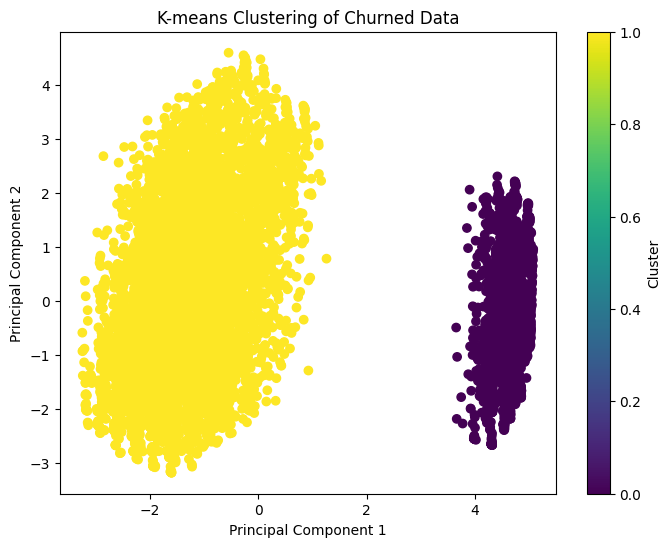

Cluster Means:
         Dependentsint  Partnerint  PhoneServiceint  PaperlessBillingint  \
cluster                                                                    
0             0.419079    0.482237         1.000000             0.292763   
1             0.265239    0.482583         0.876633             0.675435   

         genderint  MultipleLinesint  InternetServiceint  OnlineSecurityint  \
cluster                                                                       
0         0.509211          0.223684            0.000000           2.000000   
1         0.503447          0.723331            1.561684           0.365566   

         OnlineBackupint  DeviceProtectionint  TechSupportint  StreamingTVint  \
cluster                                                                         
0               2.000000             2.000000        2.000000        2.000000   
1               0.439949             0.438679        0.370102        0.490385   

         StreamingMoviesint  Contracti

In [60]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#K Means Clustering for


x1_cols = x_cols + ['Churnint']


c1 = df[x1_cols]

ci = StandardScaler().fit_transform(c1)

kmeans = KMeans(init="random", n_clusters=2, n_init=10, random_state=1)
ci1 = kmeans.fit(ci)






import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
ci_pca = pca.fit_transform(ci)


plt.figure(figsize=(8, 6))
plt.scatter(ci_pca[:, 0], ci_pca[:, 1], c=ci1.labels_, cmap='viridis')
plt.title('K-means Clustering of Churned Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

df['cluster'] = ci1.labels_


cluster_means = df.groupby('cluster')[x1_cols].mean()


print("Cluster Means:")
print(cluster_means)

1869
1869
Cluster Means:
         Dependentsint  Partnerint  PhoneServiceint  PaperlessBillingint  \
cluster                                                                    
0             0.247788    0.256637         1.000000             0.371681   
1             0.253521    0.647887         0.951710             0.810865   
2             0.136616    0.252581         0.884035             0.758539   

         genderint  MultipleLinesint  InternetServiceint  OnlineSecurityint  \
cluster                                                                       
0         0.504425          0.088496            0.000000           2.000000   
1         0.533199          0.857143            1.875252           0.289738   
2         0.482923          0.598888            1.684670           0.119936   

         OnlineBackupint  DeviceProtectionint  TechSupportint  StreamingTVint  \
cluster                                                                         
0               2.000000            

<ipython-input-59-17716e8609e0>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned['cluster'] = ci1.labels_
<ipython-input-59-17716e8609e0>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned['cluster'] = ci1.labels_


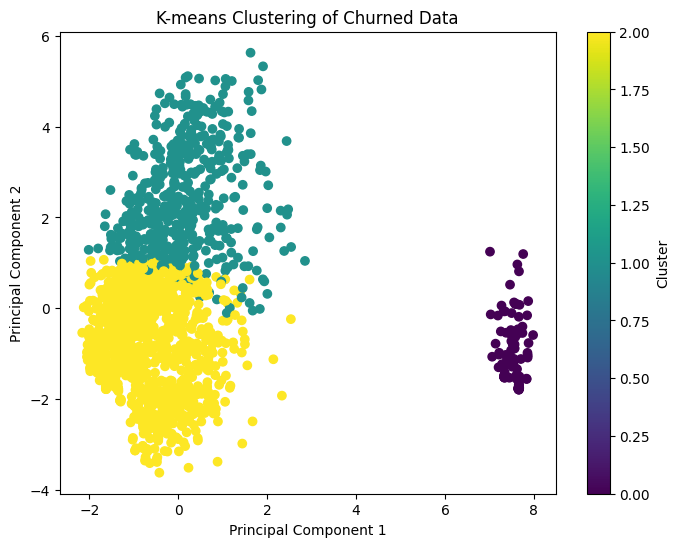

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

churned = df[df['Churnint']== 1 ]





c1 = churned[x_cols]

print(len(c1))

ci = StandardScaler().fit_transform(c1)

kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)
ci1 = kmeans.fit(ci)

print(len(ci1.labels_))

churned['cluster'] = ci1.labels_

churned['cluster'] = ci1.labels_



cluster_means = churned.groupby('cluster')[x_cols].mean()


print("Cluster Means:")
print(cluster_means)



import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
ci_pca = pca.fit_transform(ci)


plt.figure(figsize=(8, 6))
plt.scatter(ci_pca[:, 0], ci_pca[:, 1], c=ci1.labels_, cmap='viridis')
plt.title('K-means Clustering of Churned Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
churned_payments = df[df['Churn'] == 'Yes']['TotalCharges']
non_churned_payments = df[df['Churn'] == 'No']['TotalCharges']


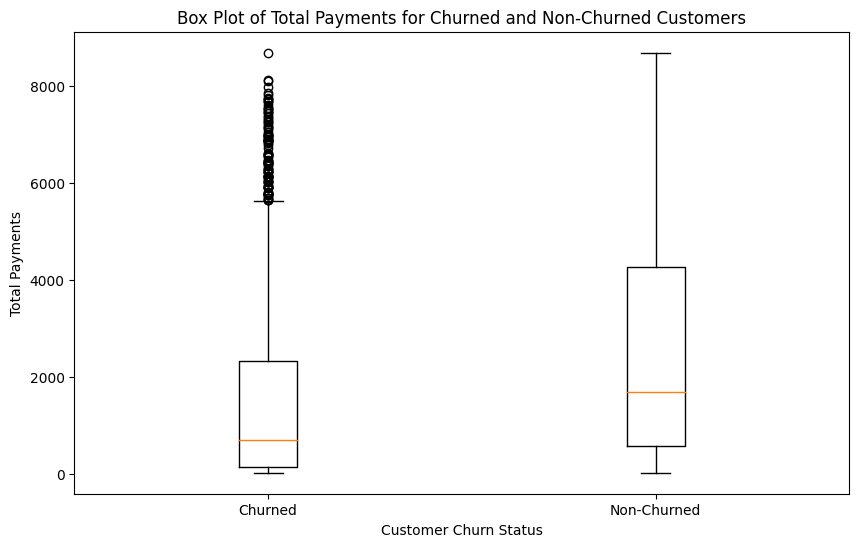

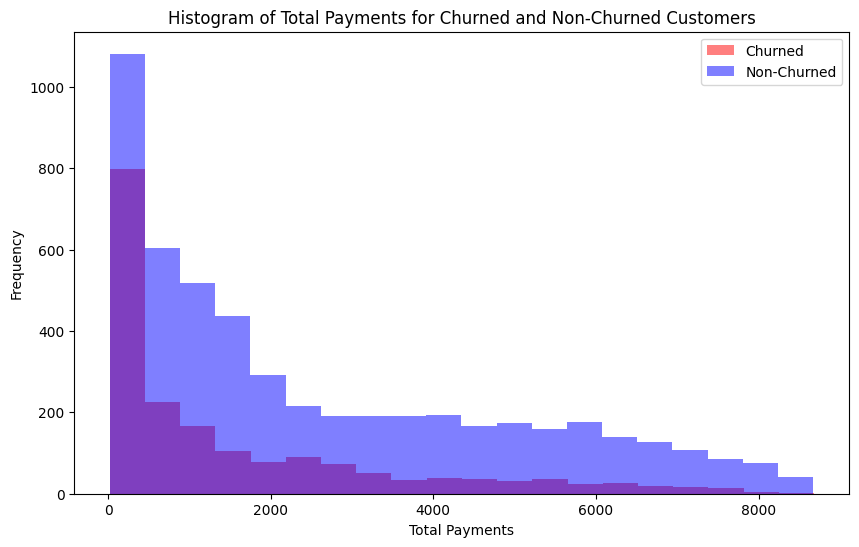

In [ ]:
churned_payments = df[df['Churn'] == 'Yes']['TotalCharges']
non_churned_payments = df[df['Churn'] == 'No']['TotalCharges']

# Plot boxplots for churned and non-churned payments
plt.figure(figsize=(10, 6))
plt.boxplot([churned_payments, non_churned_payments], labels=['Churned', 'Non-Churned'])
plt.title('Box Plot of Total Payments for Churned and Non-Churned Customers')
plt.xlabel('Customer Churn Status')
plt.ylabel('Total Payments')
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(churned_payments, bins=20, alpha=0.5, label='Churned', color='red')
plt.hist(non_churned_payments, bins=20, alpha=0.5, label='Non-Churned', color='blue')
plt.title('Histogram of Total Payments for Churned and Non-Churned Customers')
plt.xlabel('Total Payments')
plt.ylabel('Frequency')
plt.legend()
plt.show()


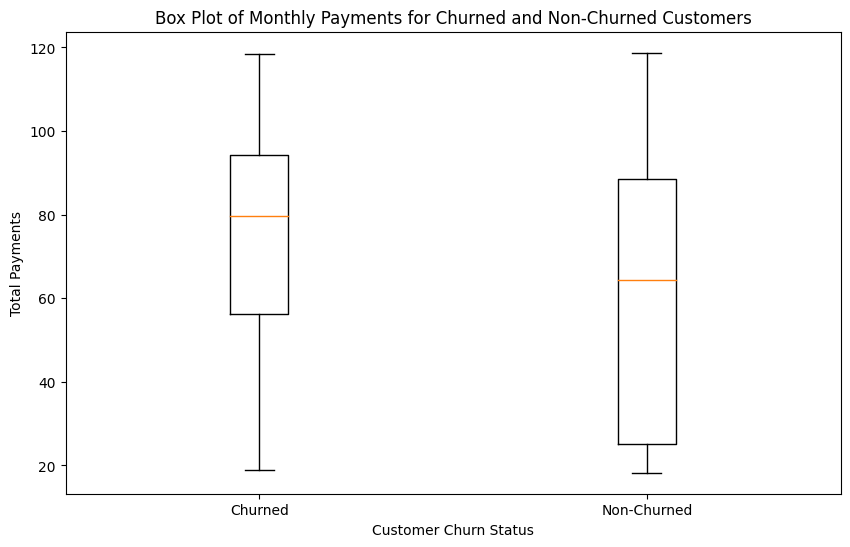

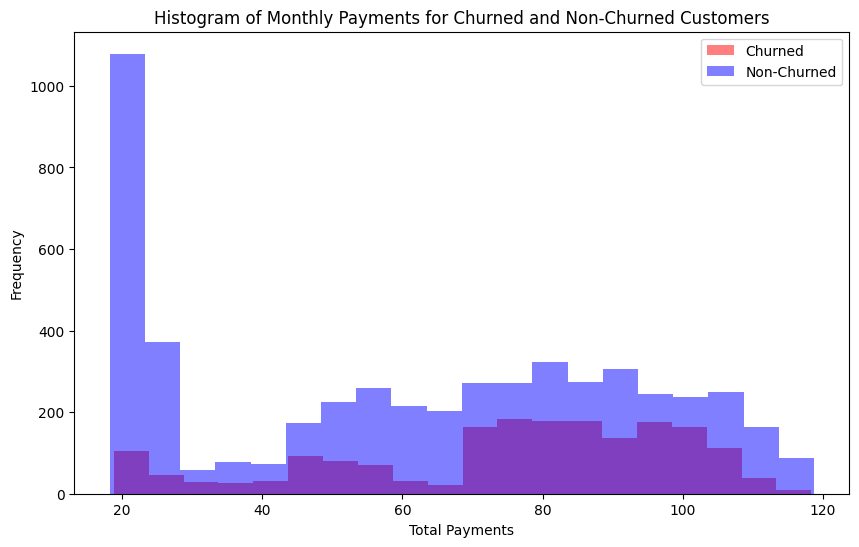

In [ ]:
churned_payments1 = df[df['Churn'] == 'Yes']['MonthlyCharges']
non_churned_payments1 = df[df['Churn'] == 'No']['MonthlyCharges']

# Plot boxplots for churned and non-churned payments
plt.figure(figsize=(10, 6))
plt.boxplot([churned_payments1, non_churned_payments1], labels=['Churned', 'Non-Churned'])
plt.title('Box Plot of Monthly Payments for Churned and Non-Churned Customers')
plt.xlabel('Customer Churn Status')
plt.ylabel('Total Payments')
plt.show()
plt.figure(figsize=(10, 6))
plt.hist(churned_payments1, bins=20, alpha=0.5, label='Churned', color='red')
plt.hist(non_churned_payments1, bins=20, alpha=0.5, label='Non-Churned', color='blue')
plt.title('Histogram of Monthly Payments for Churned and Non-Churned Customers')
plt.xlabel('Total Payments')
plt.ylabel('Frequency')
plt.legend()
plt.show()

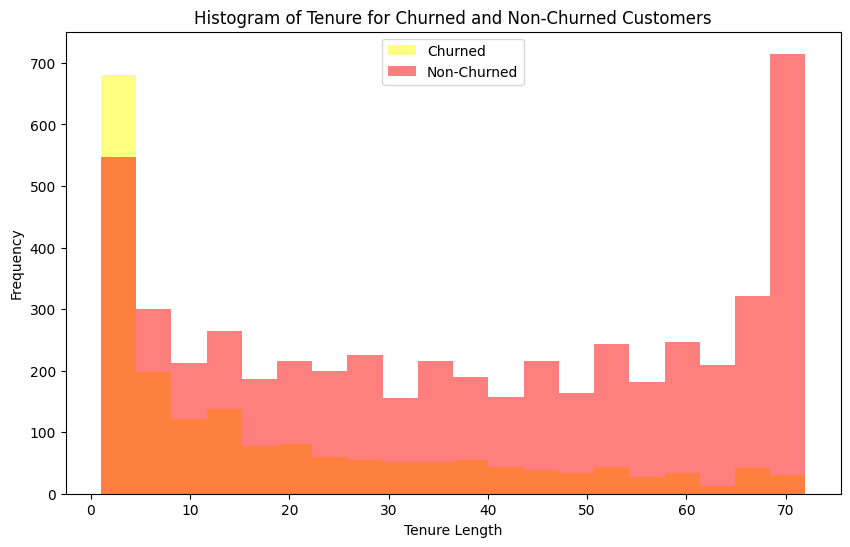

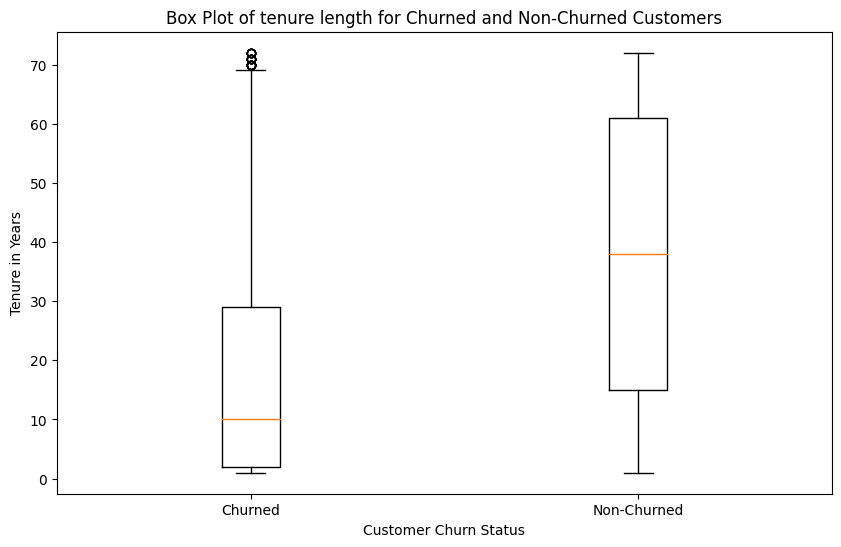

In [ ]:
churned_tenure = df[df['Churn'] == 'Yes']['tenure']
non_churned_tenure = df[df['Churn'] == 'No']['tenure']
plt.figure(figsize=(10, 6))
plt.hist(churned_tenure, bins=20, alpha=0.5, label='Churned', color='yellow')
plt.hist(non_churned_tenure, bins=20, alpha=0.5, label='Non-Churned', color='red')
plt.title('Histogram of Tenure for Churned and Non-Churned Customers')
plt.xlabel('Tenure Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.boxplot([churned_tenure, non_churned_tenure], labels=['Churned', 'Non-Churned'])
plt.title('Box Plot of tenure length for Churned and Non-Churned Customers')
plt.xlabel('Customer Churn Status')
plt.ylabel('Tenure in Years')
plt.show()

In [ ]:
churned_mean = churned_payments.mean()
churned_median = churned_payments.median()
churned_std = churned_payments.std()
churned_count = churned_payments.count()


non_churned_mean = non_churned_payments.mean()
non_churned_median = non_churned_payments.median()
non_churned_std = non_churned_payments.std()
non_churned_count = non_churned_payments.count()

print("Descriptive statistics for total churned payments:")
print("Mean:", churned_mean)
print("Median:", churned_median)
print("Standard Deviation:", churned_std)
print("Number of Entries:", churned_count)

print("\nDescriptive statistics for total non-churned payments:")
print("Mean:", non_churned_mean)
print("Median:", non_churned_median)
print("Standard Deviation:", non_churned_std)
print("Number of Entries:", non_churned_count)

churned_mean1 = churned_payments1.mean()
churned_median1 = churned_payments1.median()
churned_std1 = churned_payments1.std()
churned_count1 = churned_payments1.count()


non_churned_mean1 = non_churned_payments1.mean()
non_churned_median1 = non_churned_payments1.median()
non_churned_std1 = non_churned_payments1.std()
non_churned_count1 = non_churned_payments1.count()


print("Descriptive statistics for monthly churned payments:")
print("Mean:", churned_mean1)
print("Median:", churned_median1)
print("Standard Deviation:", churned_std1)
print("Number of Entries:", churned_count1)


print("\nDescriptive statistics for monthly non-churned payments:")
print("Mean:", non_churned_mean1)
print("Median:", non_churned_median1)
print("Standard Deviation:", non_churned_std1)
print("Number of Entries:", non_churned_count1)

Descriptive statistics for total churned payments:
Mean: 1531.7960941680042
Median: 703.55
Standard Deviation: 1890.822994464404
Number of Entries: 1869

Descriptive statistics for total non-churned payments:
Mean: 2555.344141003293
Median: 1683.6
Standard Deviation: 2329.4569835604343
Number of Entries: 5163
Descriptive statistics for monthly churned payments:
Mean: 74.44133226324237
Median: 79.65
Standard Deviation: 24.666053259397433
Number of Entries: 1869

Descriptive statistics for monthly non-churned payments:
Mean: 61.307408483439865
Median: 64.45
Standard Deviation: 31.094556906672572
Number of Entries: 5163


In [ ]:
c1 = df[df['Churn']=='Yes'][originalcols]
print("Category ","ID ","Percentage "," Number Unique Values")
print()
for column in c1.columns:

    num_unique = c1[column].nunique()
    value_counts = c1[column].value_counts()


    max_count = value_counts.max()
    max_value = value_counts.idxmax()


    total_count = value_counts.sum()
    percentage = (max_count / total_count) * 100
    print(column,max_value,percentage,num_unique)
    print()





Category  ID  Percentage   Number Unique Values

gender Female 50.24077046548957 2

SeniorCitizen 0.0 74.53183520599251 2

Partner No 64.20545746388443 2

Dependents No 82.55751738897807 2

PhoneService Yes 90.90422685928304 2

MultipleLines Yes 45.4788657035848 3

InternetService Fiber optic 69.39539860888175 3

OnlineSecurity No 78.1701444622793 3

OnlineBackup No 65.97110754414125 3

DeviceProtection No 64.7940074906367 3

TechSupport No 77.36757624398074 3

StreamingTV No 50.40128410914928 3

StreamingMovies No 50.187265917603 3

Contract Month-to-month 88.55002675227395 3

PaperlessBilling Yes 74.90636704119851 2

PaymentMethod Electronic check 57.30337078651685 4



In [ ]:
nc1 = df[df['Churn']=='No'][originalcols]
print("Category ","ID ","Percentage "," Number Unique Values")
print()
for column in nc1.columns:

    num_unique = nc1[column].nunique()
    value_counts = nc1[column].value_counts()


    max_count = value_counts.max()
    max_value = value_counts.idxmax()


    total_count = value_counts.sum()
    percentage = (max_count / total_count) * 100
    print(column,max_value,percentage,num_unique)
    print()

Category  ID  Percentage   Number Unique Values

gender Male 50.72632190586867 2

SeniorCitizen 0.0 87.10052295177223 2

Partner Yes 52.76002324230099 2

Dependents No 65.65950029052875 2

PhoneService Yes 90.12202208018594 2

MultipleLines No 49.11872942087933 3

InternetService DSL 37.9043191942669 3

OnlineSecurity No 39.434437342630254 3

OnlineBackup Yes 36.8390470656595 3

DeviceProtection No 36.47104396668603 3

TechSupport No 39.240751501065276 3

StreamingTV Yes 36.58725547162503 3

StreamingMovies Yes 37.05210149138098 3

Contract Month-to-month 42.99825682742591 3

PaperlessBilling Yes 53.612240945186905 2

PaymentMethod Mailed check 25.101685066821616 4



gender
Female    939
Male      930
Name: count, dtype: int64
gender
Male      2619
Female    2544
Name: count, dtype: int64


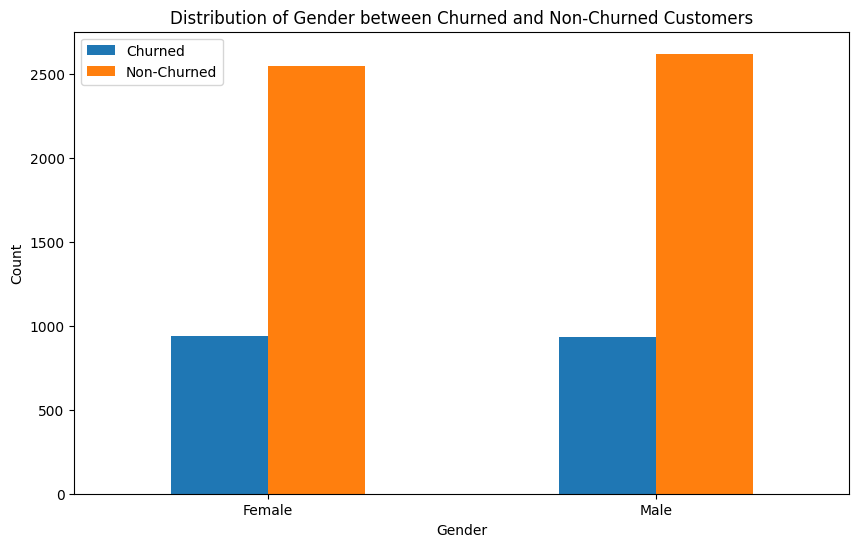

In [ ]:

c1 = df[df['Churn']=='Yes'][originalcols]
nc1 = df[df['Churn']=='No'][originalcols]

gendc1 = c1['gender']
gendnc1 = nc1['gender']
churned_counts = gendc1.value_counts()
print(churned_counts)
non_churned_counts = gendnc1.value_counts()
print(non_churned_counts)
plot_data = pd.DataFrame({'Churned': churned_counts, 'Non-Churned': non_churned_counts})


plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Gender between Churned and Non-Churned Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()


Partner
No     1200
Yes     669
Name: count, dtype: int64
Partner
Yes    2724
No     2439
Name: count, dtype: int64


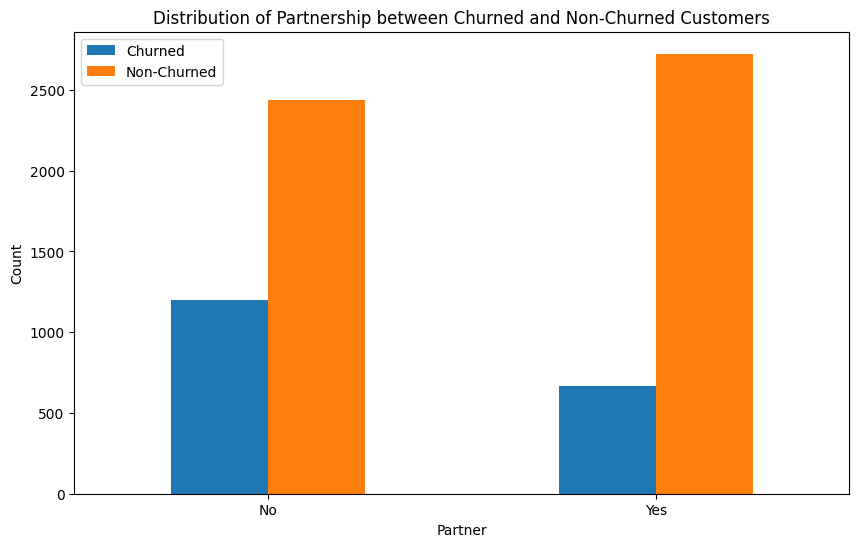

In [ ]:
partnerc1 = c1['Partner']
partnernc1 = nc1['Partner']
pt_counts = partnerc1.value_counts()
print(pt_counts)
npt_counts = partnernc1.value_counts()
print(npt_counts)
plot_data = pd.DataFrame({'Churned': pt_counts, 'Non-Churned': npt_counts})


plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Partnership between Churned and Non-Churned Customers')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

OnlineSecurity
No                     1461
Yes                     295
No internet service     113
Name: count, dtype: int64
OnlineSecurity
No                     2036
Yes                    1720
No internet service    1407
Name: count, dtype: int64


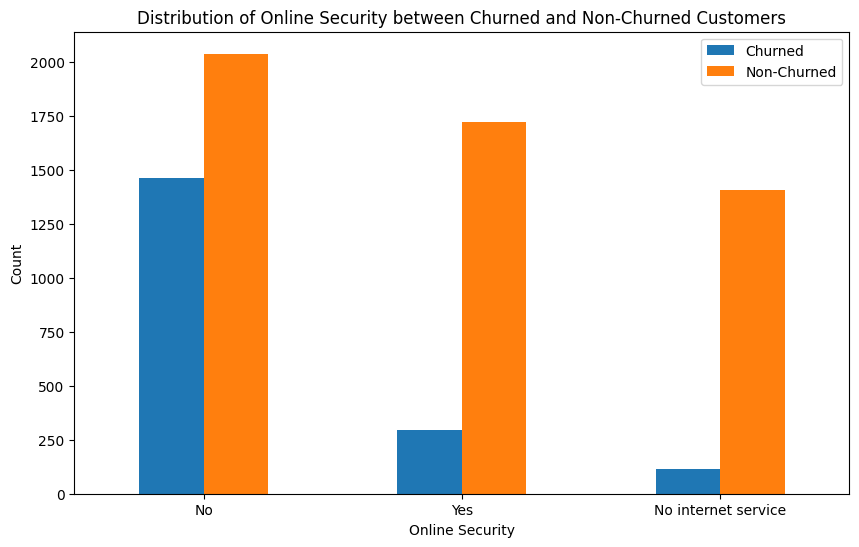

In [ ]:
osc1 = c1['OnlineSecurity']
osnc1 = nc1['OnlineSecurity']

os_counts = osc1.value_counts()
print(os_counts)
nos_counts = osnc1.value_counts()
print(nos_counts)
plot_data = pd.DataFrame({'Churned': os_counts, 'Non-Churned': nos_counts})


plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Online Security between Churned and Non-Churned Customers')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

OnlineSecurity
No                     1461
Yes                     295
No internet service     113
Name: count, dtype: int64
OnlineBackup
Yes                    1902
No                     1854
No internet service    1407
Name: count, dtype: int64


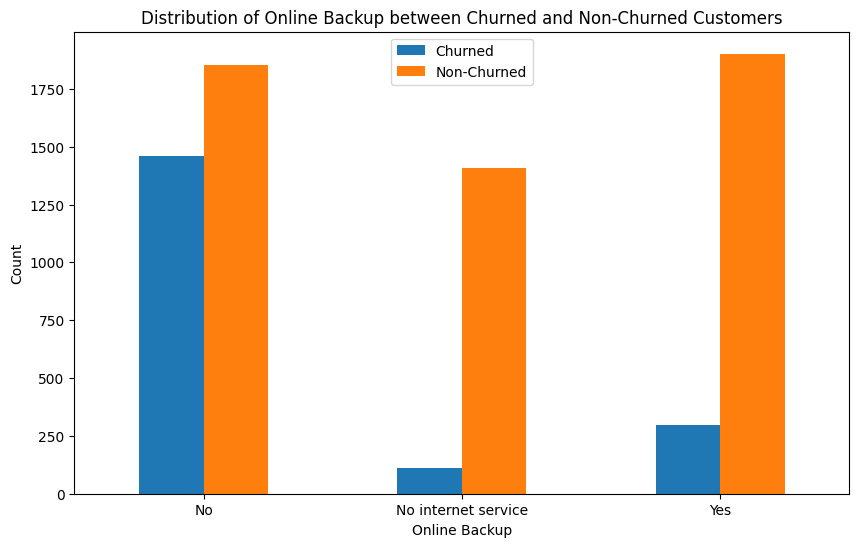

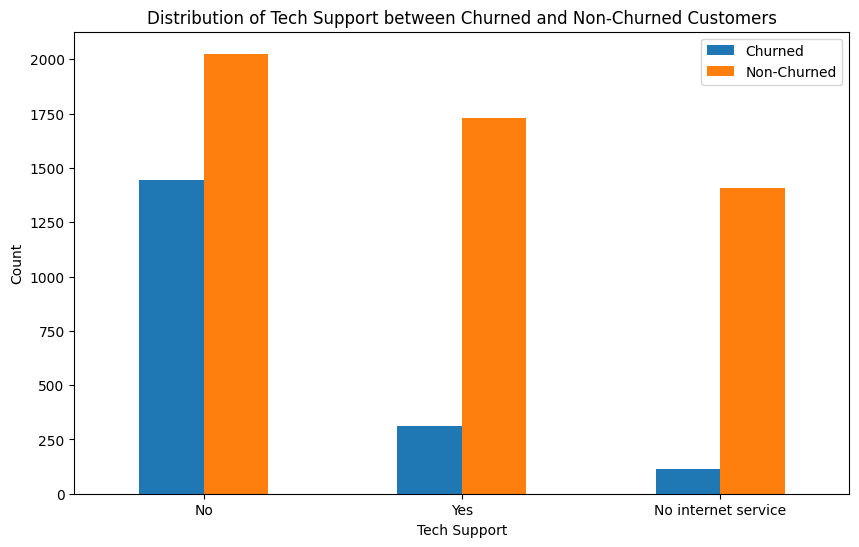

OnlineSecurity
No                     1461
Yes                     295
No internet service     113
Name: count, dtype: int64
OnlineSecurity
No                     2036
Yes                    1720
No internet service    1407
Name: count, dtype: int64


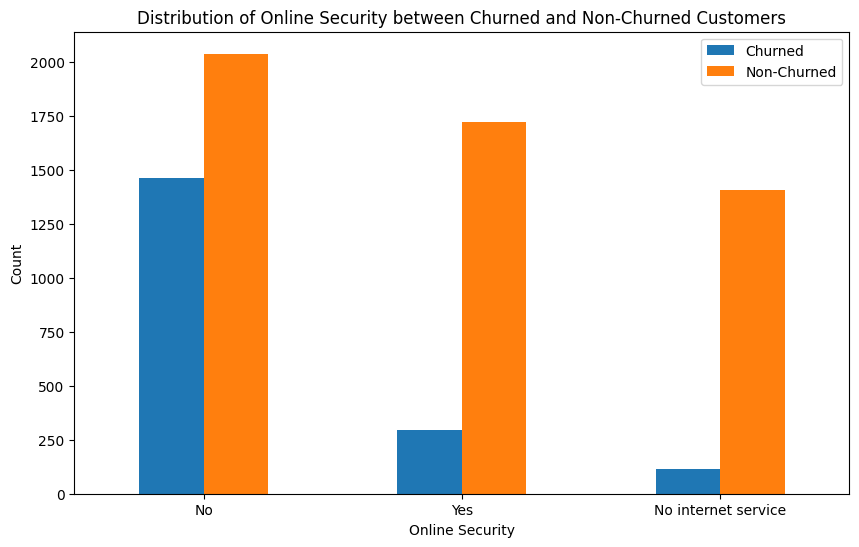

In [ ]:
obc1 = c1['OnlineBackup']
obnc1 = nc1['OnlineBackup']

ob_counts = osc1.value_counts()
print(ob_counts)
nob_counts = obnc1.value_counts()
print(nob_counts)
plot_data = pd.DataFrame({'Churned': ob_counts, 'Non-Churned': nob_counts})


plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Online Backup between Churned and Non-Churned Customers')
plt.xlabel('Online Backup')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()
tsc1 = c1['TechSupport']
tsnc1 = nc1['TechSupport']

ts_counts = tsc1.value_counts()

nts_counts = tsnc1.value_counts()

plot_data = pd.DataFrame({'Churned': ts_counts, 'Non-Churned': nts_counts})


plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Tech Support between Churned and Non-Churned Customers')
plt.xlabel('Tech Support')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()
osc1 = c1['OnlineSecurity']
osnc1 = nc1['OnlineSecurity']

os_counts = osc1.value_counts()
print(os_counts)
nos_counts = osnc1.value_counts()
print(nos_counts)
plot_data = pd.DataFrame({'Churned': os_counts, 'Non-Churned': nos_counts})


plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Online Security between Churned and Non-Churned Customers')
plt.xlabel('Online Security')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

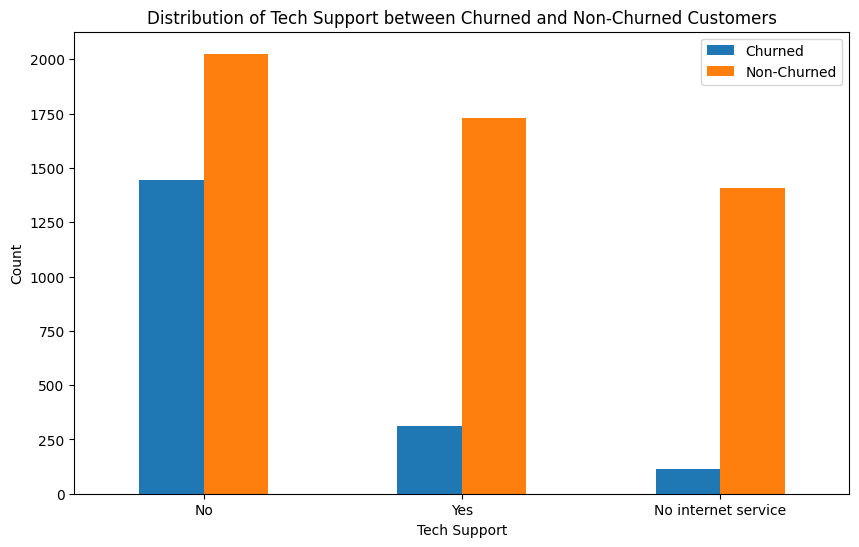

PaymentMethod
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: count, dtype: int64
PaymentMethod
Mailed check                 1296
Electronic check             1294
Credit card (automatic)      1289
Bank transfer (automatic)    1284
Name: count, dtype: int64


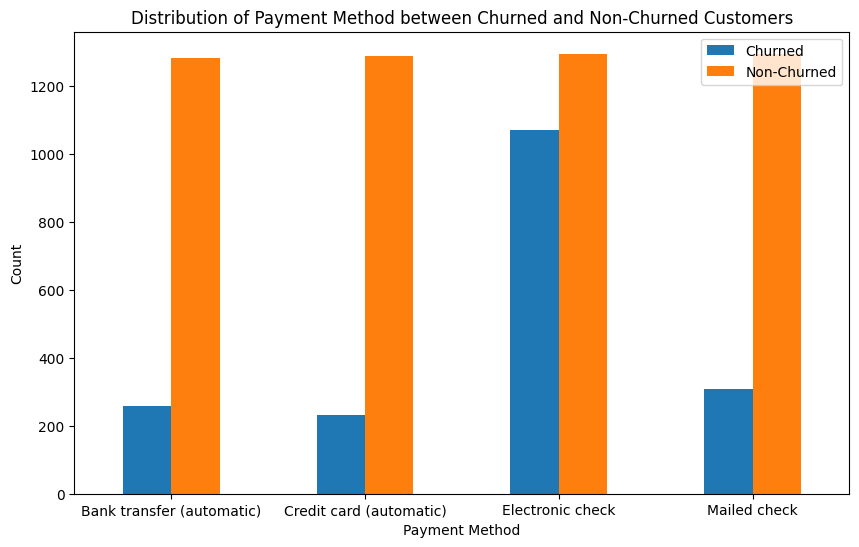

Contract
Month-to-month    1655
One year           166
Two year            48
Name: count, dtype: int64
Contract
Month-to-month    2220
Two year          1637
One year          1306
Name: count, dtype: int64


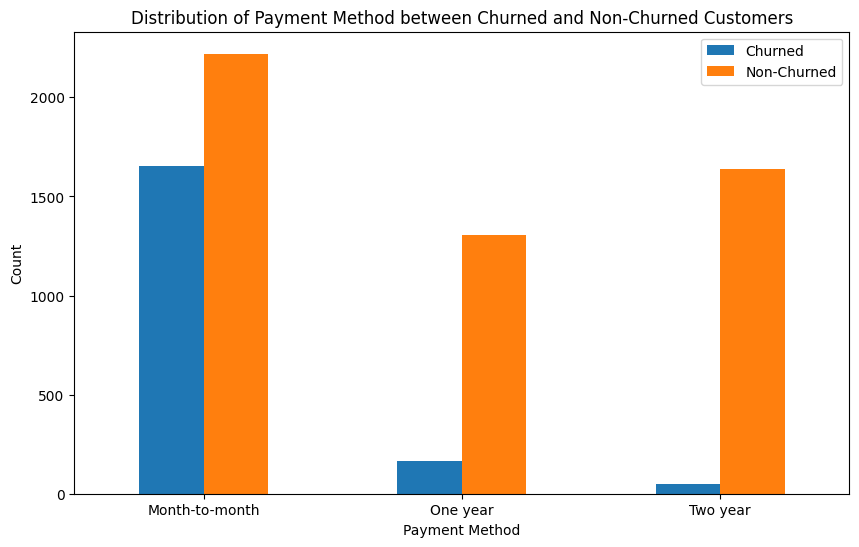

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64
InternetService
DSL            1957
Fiber optic    1799
No             1407
Name: count, dtype: int64


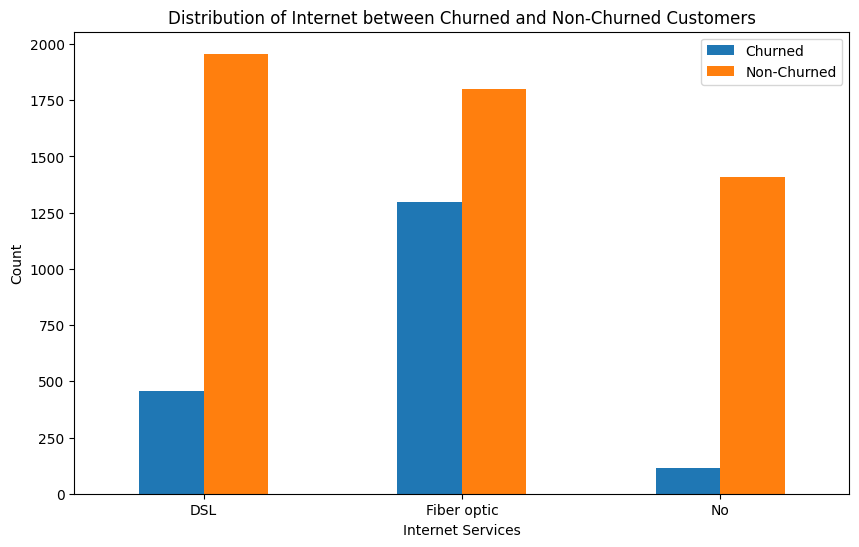

In [ ]:
ac1 = c1['PaymentMethod']
bnc1 = nc1['PaymentMethod']

a_counts = ac1.value_counts()
print(a_counts)
b_counts = bnc1.value_counts()
print(b_counts)
plot_data = pd.DataFrame({'Churned': a_counts, 'Non-Churned': b_counts})


plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Payment Method between Churned and Non-Churned Customers')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()
ac1 = c1['Contract']
bnc1 = nc1['Contract']

a_counts = ac1.value_counts()
print(a_counts)
b_counts = bnc1.value_counts()
print(b_counts)
plot_data = pd.DataFrame({'Churned': a_counts, 'Non-Churned': b_counts})


plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Contract between Churned and Non-Churned Customers')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

ac1 = c1['InternetService']
bnc1 = nc1['InternetService']

a_counts = ac1.value_counts()
print(a_counts)
b_counts = bnc1.value_counts()
print(b_counts)
plot_data = pd.DataFrame({'Churned': a_counts, 'Non-Churned': b_counts})


plot_data.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Internet between Churned and Non-Churned Customers')
plt.xlabel('Internet Services')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

InternetService
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64
InternetService
DSL            1957
Fiber optic    1799
No             1407
Name: count, dtype: int64


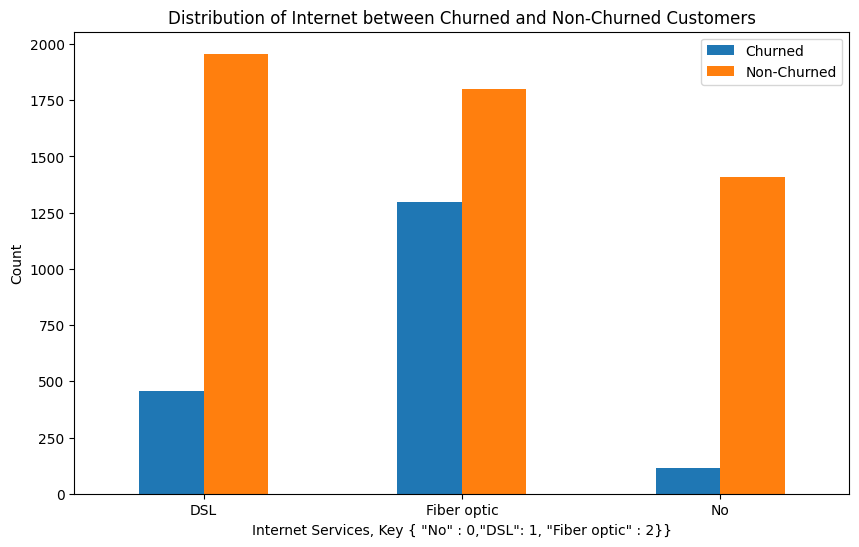